<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'prefer_followers',
       'prefer_followees', 'cosine_followers', 'cosine_followees',
       'num_followers_s', 'num_followers_d', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_u_dot', 'svd_v_dot'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9246283155938503 test Score 0.9151867079218412
Estimators =  50 Train Score 0.9193629822863635 test Score 0.8999936070918662
Estimators =  100 Train Score 0.9217936880980361 test Score 0.9173799932863377
Estimators =  250 Train Score 0.9215970124202753 test Score 0.917152565124376
Estimators =  450 Train Score 0.9217498976882799 test Score 0.9174797003839618


Text(0.5,1,'Estimators vs score at depth of 5')

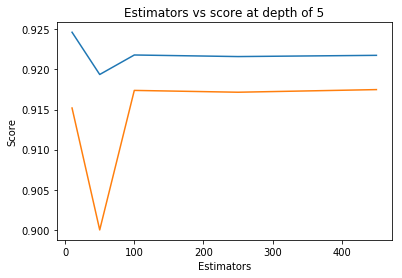

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9114363887935251 test Score 0.8904369854338188
depth =  9 Train Score 0.957566168009206 test Score 0.9228689701782546
depth =  11 Train Score 0.9633620249023737 test Score 0.925337268128162
depth =  15 Train Score 0.9648618513252248 test Score 0.9238900634249471
depth =  20 Train Score 0.9639931688261222 test Score 0.9229078613693998
depth =  35 Train Score 0.964068365228242 test Score 0.9230216435576598
depth =  50 Train Score 0.964068365228242 test Score 0.9230216435576598
depth =  70 Train Score 0.964068365228242 test Score 0.9230216435576598
depth =  130 Train Score 0.964068365228242 test Score 0.9230216435576598


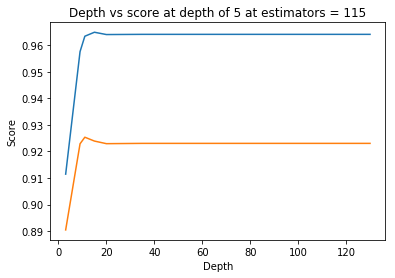

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96273528 0.96268463 0.96083443 0.96237495 0.96441594]
mean train scores [0.96410908 0.9636035  0.96170108 0.9635212  0.96567092]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9659765277877083
Test f1 score 0.9271458978735959


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


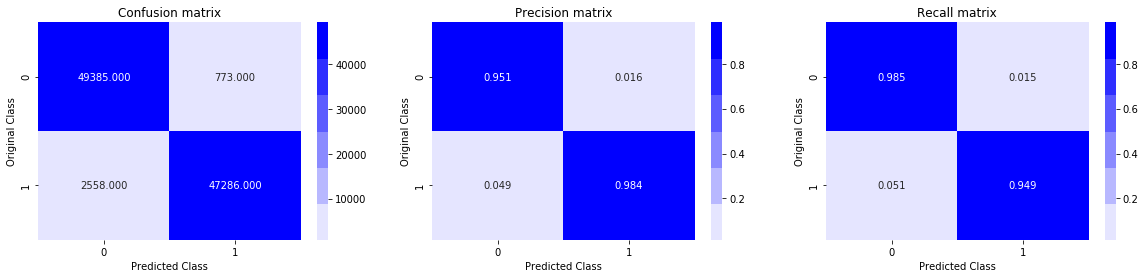

Test confusion_matrix


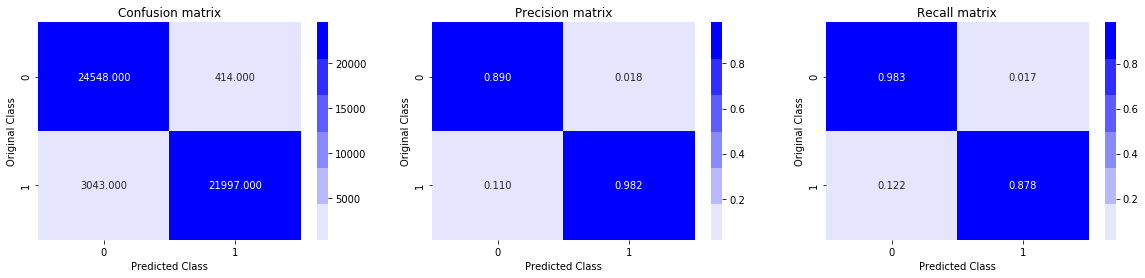

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

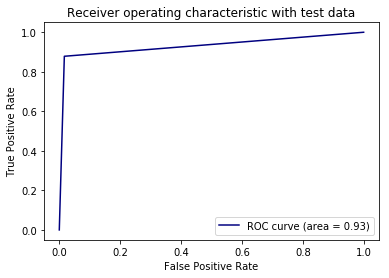

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

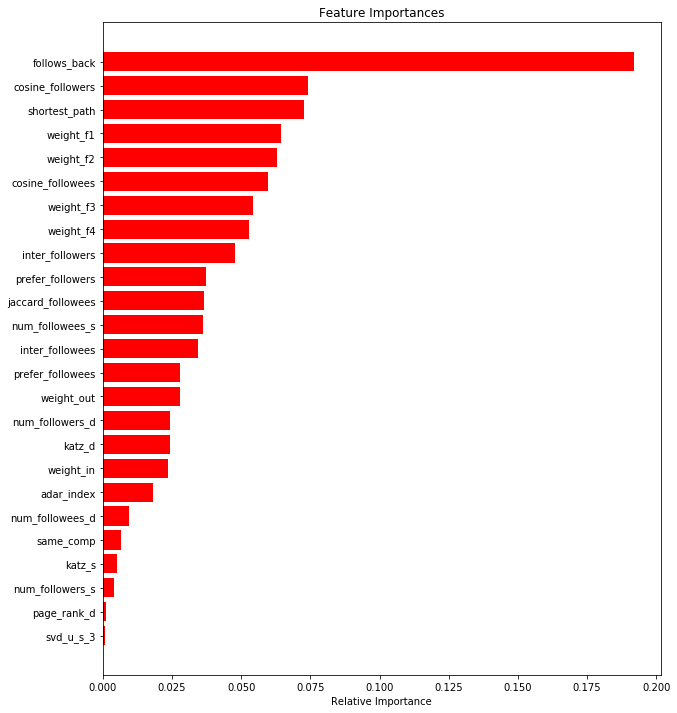

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Estimators =  10 Train Score 0.9301323549801094 test Score 0.9265072300189535
Estimators =  50 Train Score 0.9727894634585297 test Score 0.9301398897838067
Estimators =  100 Train Score 0.9770927170498104 test Score 0.9287937496029982
Estimators =  250 Train Score 0.9863735997333305 test Score 0.92622376880477
Estimators =  450 Train Score 0.9943056058593908 test Score 0.919175099269886


Text(0.5,1,'Estimators vs score at depth of 5')

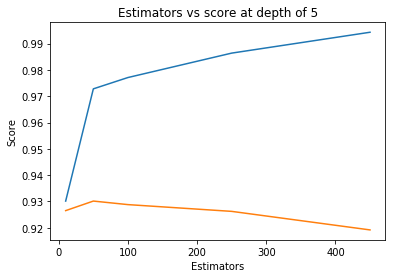

In [17]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    y_train_pred=[]
    y_test_pred=[]
    xgb_model = xgb.XGBClassifier(class_weight=None,
            max_depth=5,n_estimators=i, n_jobs=-1,random_state=25)
    xgb_model.fit(df_final_train,y_train)
    for j in range(0, df_final_train.shape[0], 1000):
        y_train_pred.extend(xgb_model.predict_proba(df_final_train[j:j+1000])[:,1])
        y_train_pred = list(np.around(np.array(y_train_pred)))
    for j in range(0, df_final_test.shape[0], 1000):
        y_test_pred.extend(xgb_model.predict_proba(df_final_test[j:j+1000])[:,1])
        y_test_pred = list(np.around(np.array(y_test_pred)))
    train_sc = f1_score(y_train,y_train_pred)
    test_sc = f1_score(y_test,y_test_pred)
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9191506650130435 test Score 0.9136415171027018
depth =  9 Train Score 0.9742220228933716 test Score 0.932323530652715
depth =  11 Train Score 0.9794843641982839 test Score 0.9338976983174343
depth =  15 Train Score 0.989510277502678 test Score 0.9326747241198108
depth =  20 Train Score 0.99502958103594 test Score 0.9323033648901109
depth =  35 Train Score 0.9957566616390146 test Score 0.9327649924407863
depth =  50 Train Score 0.9957566616390146 test Score 0.9327649924407863
depth =  70 Train Score 0.9957566616390146 test Score 0.9327649924407863
depth =  130 Train Score 0.9957566616390146 test Score 0.9327649924407863


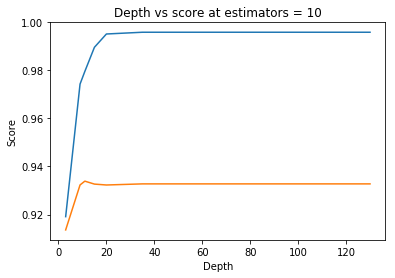

In [18]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    y_train_pred=[]
    y_test_pred=[]
    xgb_model = xgb.XGBClassifier(class_weight=None,
            max_depth=i,n_estimators=10, n_jobs=-1,random_state=25)
    xgb_model.fit(df_final_train,y_train)
    for j in range(0, df_final_train.shape[0], 1000):
        y_train_pred.extend(xgb_model.predict_proba(df_final_train[j:j+1000])[:,1])
        y_train_pred = list(np.around(np.array(y_train_pred)))
    for j in range(0, df_final_test.shape[0], 1000):
        y_test_pred.extend(xgb_model.predict_proba(df_final_test[j:j+1000])[:,1])
        y_test_pred = list(np.around(np.array(y_test_pred)))
    train_sc = f1_score(y_train,y_train_pred)
    test_sc = f1_score(y_test,y_test_pred)
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at estimators = 10')
plt.show()

In [19]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)}

xgb_model = xgb.XGBClassifier(class_weight=None,n_jobs=-1,random_state=25)

rf_random = RandomizedSearchCV(xgb_model, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.98031569 0.98043801 0.98048185 0.98053086 0.9804912 ]
mean train scores [0.99990748 0.99993758 0.9927784  0.99567543 0.99601418]


In [20]:
print(rf_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=25, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [21]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
       n_estimators=112, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=25, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [22]:
xgb_model.fit(df_final_train,y_train)
y_train_pred = xgb_model.predict_proba(df_final_train)[:,1]
y_test_pred = xgb_model.predict_proba(df_final_test)[:,1]
y_train_pred = list(np.around(np.array(y_train_pred)))
y_test_pred = list(np.around(np.array(y_test_pred)))
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9955508133354808
Test f1 score 0.9256037007172262


Train confusion_matrix


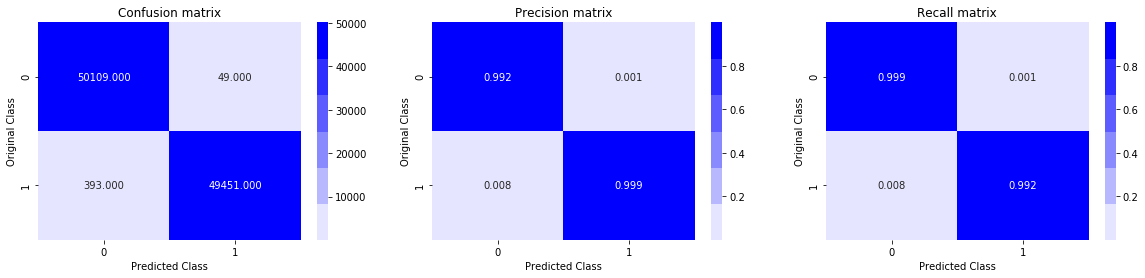

Test confusion_matrix


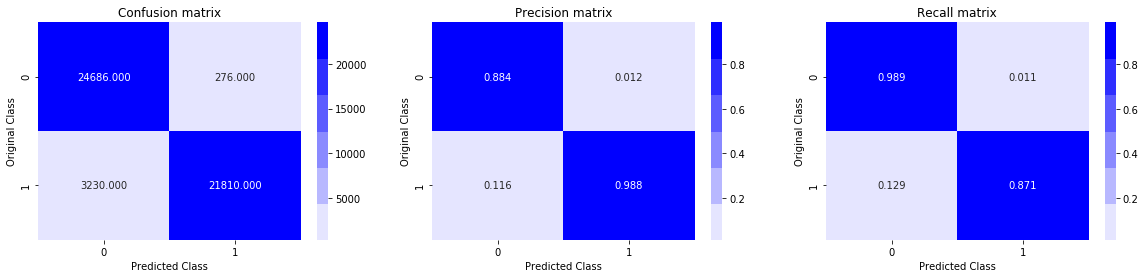

In [23]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

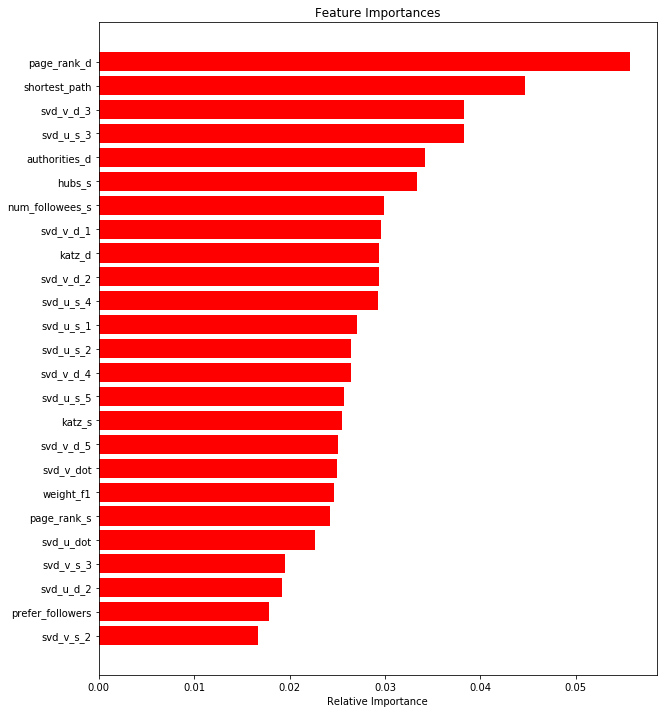

In [24]:
features = df_final_train.columns
importances = xgb_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.